In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [283]:
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_11820\2286730898.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null




# Data cleaning


 **Handling missing data**

In [285]:
def missing_values():
    """Checking on the missing data in the df"""
    return df.isna().sum().sort_values(ascending=False)
missing_values()

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

***Both Schedule and Air.carrier have more missing data which is more than 70000***

In [286]:

df['Aircraft.Category'].value_counts()


Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [287]:
missing_values()[['Make','Model']]

Make     63
Model    92
dtype: int64

In [288]:
df.dropna(subset=['Make','Model'], inplace=True)

In [289]:
missing_values()[['Make','Model']]

Make     0
Model    0
dtype: int64





## Handling missing data for the columns with continuous data by using mean

In [290]:
# columns with missing data in continuous data
continuous_data_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

for col in continuous_data_cols:
    mean = np.floor(df[col].mean())
    df[col].fillna(mean, inplace=True)

#confirming no missing data
df[continuous_data_cols].isna().sum()


Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Number.of.Engines         0
dtype: int64

 **Checking other columns categorical data**

In [291]:
df['Amateur.Built'].value_counts()

Amateur.Built
No     80240
Yes     8438
Name: count, dtype: int64


#### There are only two categories in this column and No appears most so we impute missing data

In [292]:
df['Amateur.Built'].fillna(
    df['Amateur.Built'].mode()[0],
    inplace=True
)

df['Amateur.Built'].isna().sum()

    

0

In [293]:
missing_values()

Schedule                  76245
Air.carrier               72168
FAR.Description           56841
Aircraft.Category         56532
Longitude                 54439
Latitude                  54430
Airport.Code              38681
Airport.Name              36117
Broad.phase.of.flight     27094
Publication.Date          13765
Engine.Type                7025
Report.Status              6338
Purpose.of.flight          6138
Weather.Condition          4439
Aircraft.damage            3172
Registration.Number        1339
Injury.Severity             979
Country                     225
Location                     52
Total.Fatal.Injuries          0
Total.Uninjured               0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Event.Id                      0
Number.of.Engines             0
Amateur.Built                 0
Investigation.Type            0
Make                          0
Event.Date                    0
Accident.Number               0
Model                         0
dtype: i

In [294]:
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64


**Creating a new category for the missing data in Aircraft Category due to missing alot of values because it is important for analysis**

In [295]:
df['Aircraft.Category'].fillna('missing', inplace=True)
df['Aircraft.Category'].isna().sum()


0

In [296]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**The other columns are categorical thus we can fill the other values with a new category called 'miss'**

In [297]:
df.fillna('miss',inplace=True)
missing_values().sum()

0

## Data Analysis

### Data Compilation

In [298]:
df[['Make', 'Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88884,PIPER,PA-28-151
88885,BELLANCA,7ECA
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC
88887,CESSNA,210N




***'Make' has same words with different cases lets change to lower case 'PIPER' to 'piper'***

In [299]:
df['Make'] = df['Make'].map(
    lambda x:x.title()
)
df['Model'] = df['Model'].map(
    lambda x:x.lower()
)
df[['Make','Model']]



,Make,Model
0,Stinson,108-3
1,Piper,pa24-180
2,Cessna,172m
3,Rockwell,112
4,Cessna,501
...,...,...
88884,Piper,pa-28-151
88885,Bellanca,7eca
88886,American Champion Aircraft,8gcbc
88887,Cessna,210n


In [300]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

In [301]:
df[df['Injury.Severity'].str.contains(
    'Fatal'
)].head()[['Injury.Severity','Total.Fatal.Injuries']]

,Injury.Severity,Total.Fatal.Injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0


 **Lets limit fatal categories to one 'Fatal Category**l'

In [302]:
df['Injury.Severity'] = df['Injury.Severity'].map(
    lambda x: 'Fatal' if 'Fatal(' in x else x
)
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      67305
Fatal          17793
Incident        2214
miss             979
Minor            218
Serious          173
Unavailable       95
Name: count, dtype: int64

***one 'category' of Fatal is now created.***

## Checking duplicates


In [303]:
df.duplicated().sum()

0

### Converting Event date to datetime 


In [304]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88777 non-null  object        
 1   Investigation.Type      88777 non-null  object        
 2   Accident.Number         88777 non-null  object        
 3   Event.Date              88777 non-null  datetime64[ns]
 4   Location                88777 non-null  object        
 5   Country                 88777 non-null  object        
 6   Latitude                88777 non-null  object        
 7   Longitude               88777 non-null  object        
 8   Airport.Code            88777 non-null  object        
 9   Airport.Name            88777 non-null  object        
 10  Injury.Severity         88777 non-null  object        
 11  Aircraft.damage         88777 non-null  object        
 12  Aircraft.Category       88777 non-null  object     



create a new column for occurrence of the year

In [305]:
df['year'] = df['Event.Date'].map(
    lambda x: x.year
)

Check the columns now

In [306]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'year'],
      dtype='object')



## Checking on how accidents and incidents were distributed over the years

In [307]:
#df on incidents and accidents
accident_incident_years = df.groupby(
    'year'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()

accident_incident_years.columns.name = ""
accident_incident_years.head()

,year,Accident,Incident
0,1948,1,0
1,1962,1,0
2,1974,1,0
3,1977,1,0
4,1979,2,0


##### A plot to show accidents and incidents over the years

C:\Users\HP\Documents\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Documents\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Documents\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Documents\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

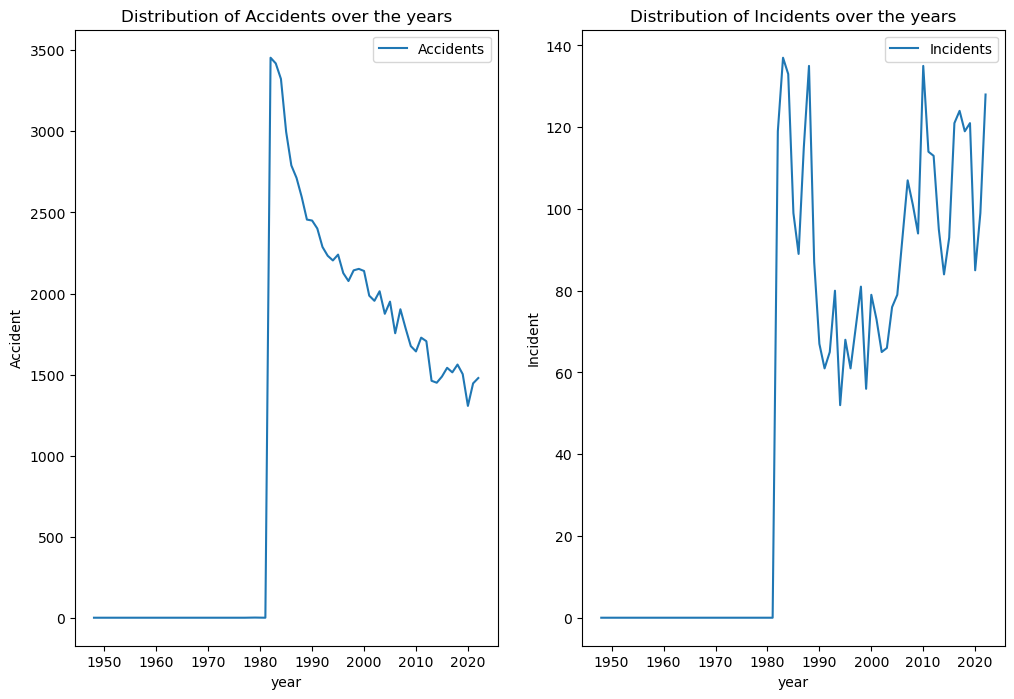

In [308]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

# Accidents plot
sns.lineplot(
    data=accident_incident_years,
    x='year',
    y='Accident',
    label='Accidents',
    ax=axes[0]
)

#  Incidents plot
sns.lineplot(
    data=accident_incident_years,
    x='year',
    y='Incident',
    label='Incidents',
    ax=axes[1]
)

axes[0].set_title('Distribution of Accidents over the years')
axes[1].set_title('Distribution of Incidents over the years')

plt.legend();

After 1980, there was a notable spike in accident cases, but the number of cases has been steadily declining ever since.

Additionally, the number of events has significantly increased since 1980 and appears to be steady.


In [309]:
df = df[df['Aircraft.Category'] == 'Airplane']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,miss,miss,...,Air Canada,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,miss,miss,miss,BLACKBURN AG STRIP,...,miss,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1/1/1982,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,miss,miss,N58,HANOVER,...,miss,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1/1/1982,1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,miss,miss,miss,miss,...,miss,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,2/1/1983,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,miss,miss,T72,HEARNE MUNICIPAL,...,miss,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,2/1/1983,1982


## Risk-Metrics

#### 1-Accident-Incident-occurences

Checking to see the aircraft models with the lowest number of accident and incident cases



In [310]:
#Creating unique name for each aircraft byformat : make_model
df['Aircraft.Name'] = df['Make'] + '_' + df['Model']

In [311]:
accident_incident_count_df = df.groupby(
    'Aircraft.Name'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()


accident_incident_count_df.columns.name = ""
accident_incident_count_df

,Aircraft.Name,Accident,Incident
0,177Mf Llc_pitts model 12,1,0
1,2007 Savage Air Llc_epic lt,0,1
2,2021Fx3 Llc_ccx-2000,2,0
3,3Xtrim_450 ultra,1,0
4,5 Rivers Llc_sq-2,1,0
...,...,...,...
7488,Zlin_z50,1,0
7489,Zodiac_601xl,1,0
7490,Zubair S Khan_raven,1,0
7491,Zuber Thomas P_zuber super drifter,1,0


In [312]:
#Adding new column for total count
accident_incident_count_df['total_count'] = (
    accident_incident_count_df['Accident'] +
    accident_incident_count_df['Incident']
)

Obtaining the least amount of risk As per the Accident and incident count
- Need to have the fewest points overall
- the fewest accidents (ideally none)
Minimal Number of Incide


In [313]:
lowest_count = accident_incident_count_df['total_count'].min()
lowest_count

1

In [314]:
#Lowest total count is 1 therefore we filter to get those models with lowest count and no accidents
first_metric_lowest_risk = accident_incident_count_df.loc[
    (accident_incident_count_df['total_count'] == 1) &
    (accident_incident_count_df['Accident'] == 0)
]

first_metric_lowest_risk

,Aircraft.Name,Accident,Incident,total_count
1,2007 Savage Air Llc_epic lt,0,1,1
6,777_ff2,0,1,1
269,Airbus Industrie_300b4-200,0,1,1
274,Airbus Industrie_a300,0,1,1
276,Airbus Industrie_a300b4-622r,0,1,1
...,...,...,...,...
7005,Tomisin Thomas J_rutan long ez,0,1,1
7023,Ttx Air Llc_lancair,0,1,1
7032,Turbo Thrush_s2r,0,1,1
7047,Ultramagic Sa_t210,0,1,1


In [315]:
first_metric_final_airplanes = list(first_metric_lowest_risk['Aircraft.Name'])

Using the first risk metric to filter the entire DF to include only our lowest risk aircraft


In [316]:
first_metric_df = df.set_index('Aircraft.Name').loc[first_metric_final_airplanes]

## 2-Injuries

Checking to eliminate the models with high number of incident causing injuries

In [317]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      21041
Fatal           5171
miss             812
Incident         244
Minor            165
Serious          127
Unavailable       20
Name: count, dtype: int64

#### understanding the unavailable column

In [318]:
unavailable_df = df[df['Injury.Severity'] == 'Unavailable']
unavailable_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Aircraft.Name
41656,20001208X07697,Accident,DCA97WA043,1997-04-27,"JINAN, CHINA",China,miss,miss,miss,miss,...,0.0,0.0,0.0,5.0,UNK,miss,Foreign,miss,1997,Mcdonnell Douglas_md-82
42287,20001208X08352,Accident,DCA97WA054,1997-07-21,"SOUTHERN THAILA, Thailand",Thailand,miss,miss,miss,miss,...,0.0,0.0,0.0,5.0,UNK,miss,Foreign,miss,1997,Learjet_lr-31
42847,20001208X08992,Accident,DCA98WA082,1997-10-09,"HARBIN, CHINA",China,miss,miss,miss,miss,...,0.0,0.0,0.0,5.0,UNK,miss,Foreign,miss,1997,Cessna_650-0220
42935,20001208X08991,Accident,DCA98WA005,1997-10-24,"MONTEVIDEO, URUGUAY",Uruguay,miss,miss,miss,miss,...,0.0,0.0,0.0,5.0,UNK,miss,Foreign,miss,1997,Mcdonnell Douglas_md-11
43693,20001211X09838,Accident,DCA98WA050,1998-04-12,"ALMA-ATA, KAZAKHSTAN",Kazakhstan,miss,miss,miss,miss,...,0.0,0.0,0.0,5.0,UNK,miss,Foreign,miss,1998,Boeing_737-200


In [319]:
unavailable_df['Investigation.Type'].value_counts()

Investigation.Type
Accident    20
Name: count, dtype: int64

accidents are the only involved in this category

In [320]:
df['Total.Injured'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Serious.Injuries']
)

so we conclude that the 'Unavailable' category is for accident cases with no injuries

**Understanding the Incident Category**

In [321]:
incident_cat_df = df[df['Injury.Severity'] == 'Incident']
incident_cat_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Aircraft.Name,Total.Injured
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,miss,miss,VNY,VAN NUYS,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,3/1/1983,1982,Piper_pa-24-180,0.0
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,miss,miss,miss,miss,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,5/1/1983,1982,Rockwell_114,0.0
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,miss,miss,ORD,CHICAGO O'HARE INTER'L,...,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12/1/1983,1982,Lockheed_l-1011,0.0
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,miss,miss,CKB,BENEDUM,...,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12/1/1983,1982,Embraer_emb-110p1,0.0
119,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,miss,miss,IAD,miss,...,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983,1982,De Havilland_dhc-6-300,0.0


In [322]:
incident_cat_df['Investigation.Type'].value_counts()

Investigation.Type
Incident    244
Name: count, dtype: int64

The Only involved incident cases

In [323]:
incident_cat_df['Total.Injured'].value_counts()

Total.Injured
0.0      229
1.0        8
2.0        3
17.0       1
33.0       1
14.0       1
380.0      1
Name: count, dtype: int64

no number of injuries

In [324]:
incident_cat_df[incident_cat_df['Total.Injured'] > 0][
    ['Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries']
]

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
425,0.0,0.0,1.0
506,1.0,0.0,0.0
1347,0.0,0.0,17.0
2282,0.0,0.0,1.0
2335,0.0,0.0,33.0
2394,0.0,0.0,1.0
2614,0.0,1.0,1.0
3170,0.0,0.0,1.0
3298,0.0,0.0,1.0
3578,0.0,0.0,14.0


There is just one case of fatal injuries and one case of serious injuries under the Incident Category for cases of injuries.

Thus, we can deduce that incident instances with no or minor injuries fall under the "Incident" category.

The best category to select as the least risky is this one.


In [325]:
#Getting the incident category
second_metric_df = first_metric_df[
    first_metric_df['Injury.Severity'] == 'Incident'
]

second_metric_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
Aircraft.Name,,,,,,,,,,,,,,,,,,,,,
Airbus Industrie_300b4-200,20081003X63346,Incident,ENG05WA019,2005-06-29,"Amsterdam, The Netherlands, Netherlands",Netherlands,miss,miss,EHAM,Amsterdam Inter. Schipol,...,miss,0.0,0.0,0.0,279.0,miss,miss,Foreign,20-10-2009,2005
Airbus Industrie_a300,20001211X10544,Incident,DCA98WA066,1998-07-09,"LONDON, United Kingdom",United Kingdom,miss,miss,miss,miss,...,miss,0.0,0.0,0.0,1.0,UNK,miss,Foreign,miss,1998
Bac_1-11-204af,20020917X03096,Incident,CHI82IA179,1982-05-21,"DAYTON, OH",United States,miss,miss,DAY,COX INTERNATIONAL,...,U.s. Air,0.0,0.0,0.0,48.0,IMC,Landing,Probable Cause,21-05-1983,1982
Beech_18,20020917X02892,Incident,ATL82IA154,1982-06-06,"MACON, GA",United States,miss,miss,MCN,LEWIS B. WILSON,...,miss,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,6/6/1983,1982
Beech_65-88,20020917X01900,Incident,CHI82IA102,1982-03-25,"KALAMAZO, MI",United States,miss,miss,AZO,KALAMAZOO,...,Basler Airlines,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,25-03-1983,1982


In [326]:
len(second_metric_df)

77

77 cases remaining

## 3-Damage

In [327]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    21698
Destroyed       3542
miss            1279
Minor            961
Unknown          100
Name: count, dtype: int64

Filtering to get the minor category

In [328]:
third_metric_df = (
    second_metric_df[second_metric_df['Aircraft.damage'] == 'Minor']
)

third_metric_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
Aircraft.Name,,,,,,,,,,,,,,,,,,,,,
Airbus Industrie_300b4-200,20081003X63346,Incident,ENG05WA019,2005-06-29,"Amsterdam, The Netherlands, Netherlands",Netherlands,miss,miss,EHAM,Amsterdam Inter. Schipol,...,miss,0.0,0.0,0.0,279.0,miss,miss,Foreign,20-10-2009,2005
Airbus Industrie_a300,20001211X10544,Incident,DCA98WA066,1998-07-09,"LONDON, United Kingdom",United Kingdom,miss,miss,miss,miss,...,miss,0.0,0.0,0.0,1.0,UNK,miss,Foreign,miss,1998
Beech_18,20020917X02892,Incident,ATL82IA154,1982-06-06,"MACON, GA",United States,miss,miss,MCN,LEWIS B. WILSON,...,miss,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,6/6/1983,1982
Beech_65-88,20020917X01900,Incident,CHI82IA102,1982-03-25,"KALAMAZO, MI",United States,miss,miss,AZO,KALAMAZOO,...,Basler Airlines,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,25-03-1983,1982
Beech_b99,20020917X04335,Incident,ATL83IA018,1982-10-28,"CLARKSVILLE, TN",United States,miss,miss,CKV,OUTLAW FIELD,...,Air Kentucky Airline,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,28-10-1983,1982


In [329]:
len(third_metric_df)

46

down to 46 cases

### 4-Amatuer-Built

In [330]:
#Getting only proffessional airplanes
fourth_metric_df = third_metric_df[third_metric_df['Amateur.Built'] == 'No']
len(fourth_metric_df)

42

In [331]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'year', 'Aircraft.Name', 'Total.Injured'],
      dtype='object')


#### 5-Number-of-Engines

Getting the number of incidents and number of engines per model

In [332]:
number_of_engines = df.groupby('Aircraft.Name')['Number.of.Engines'].mean().round()

number_of_incidents = df.groupby(
    'Aircraft.Name'
)['Investigation.Type'].value_counts().unstack(fill_value=0)['Incident']

number_of_engines = number_of_engines[
    number_of_incidents.index
]

engines_incidents = pd.concat([number_of_incidents, number_of_engines], axis=1).reset_index()
engines_incidents

,Aircraft.Name,Incident,Number.of.Engines
0,177Mf Llc_pitts model 12,0,1.0
1,2007 Savage Air Llc_epic lt,1,1.0
2,2021Fx3 Llc_ccx-2000,0,1.0
3,3Xtrim_450 ultra,0,1.0
4,5 Rivers Llc_sq-2,0,1.0
...,...,...,...
7488,Zlin_z50,0,1.0
7489,Zodiac_601xl,0,1.0
7490,Zubair S Khan_raven,0,1.0
7491,Zuber Thomas P_zuber super drifter,0,1.0


In [342]:
#Checking the relationship between Number of engines and Number of Incidents
# Convert string to float
engines_incidents.corr(numeric_only=True)


,Incident,Number.of.Engines
Incident,1.000000,0.049551
Number.of.Engines,0.049551,1.000000


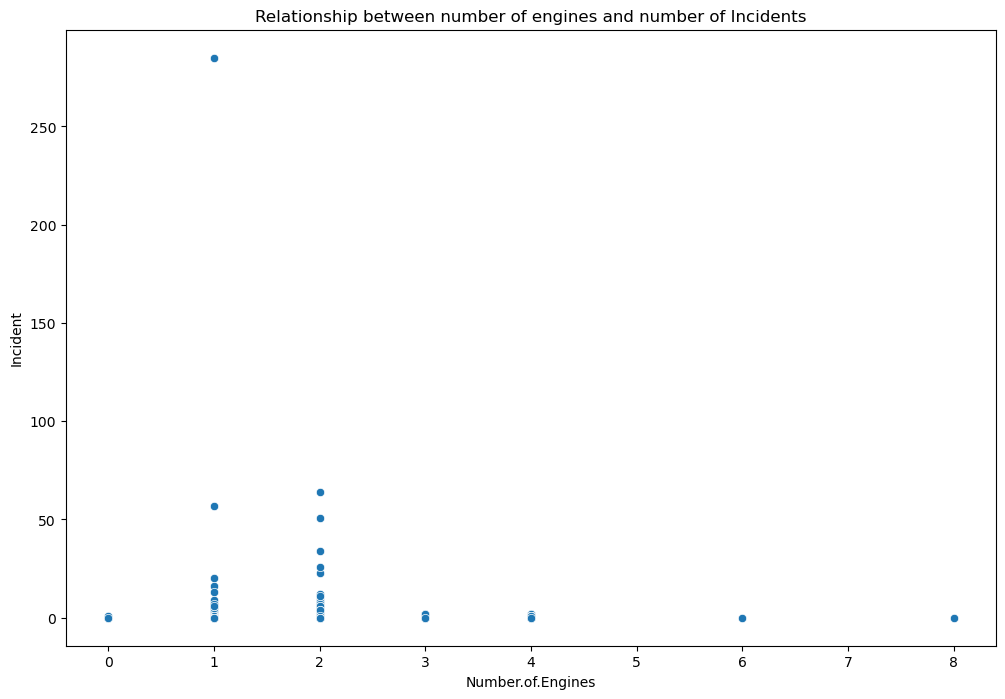

In [343]:
rel_fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=engines_incidents, x='Number.of.Engines', y='Incident')
ax.set_title('Relationship between number of engines and number of Incidents');

## 6-Engine-type

Get the engine type associated with less incidents

In [345]:
df['Engine.Type'].value_counts()

Engine.Type
Reciprocating      20696
miss                4213
Turbo Prop          1366
Turbo Fan            967
Turbo Jet            158
Unknown              151
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: count, dtype: int64

##### Plotting the distribution of incidents by Engine Type

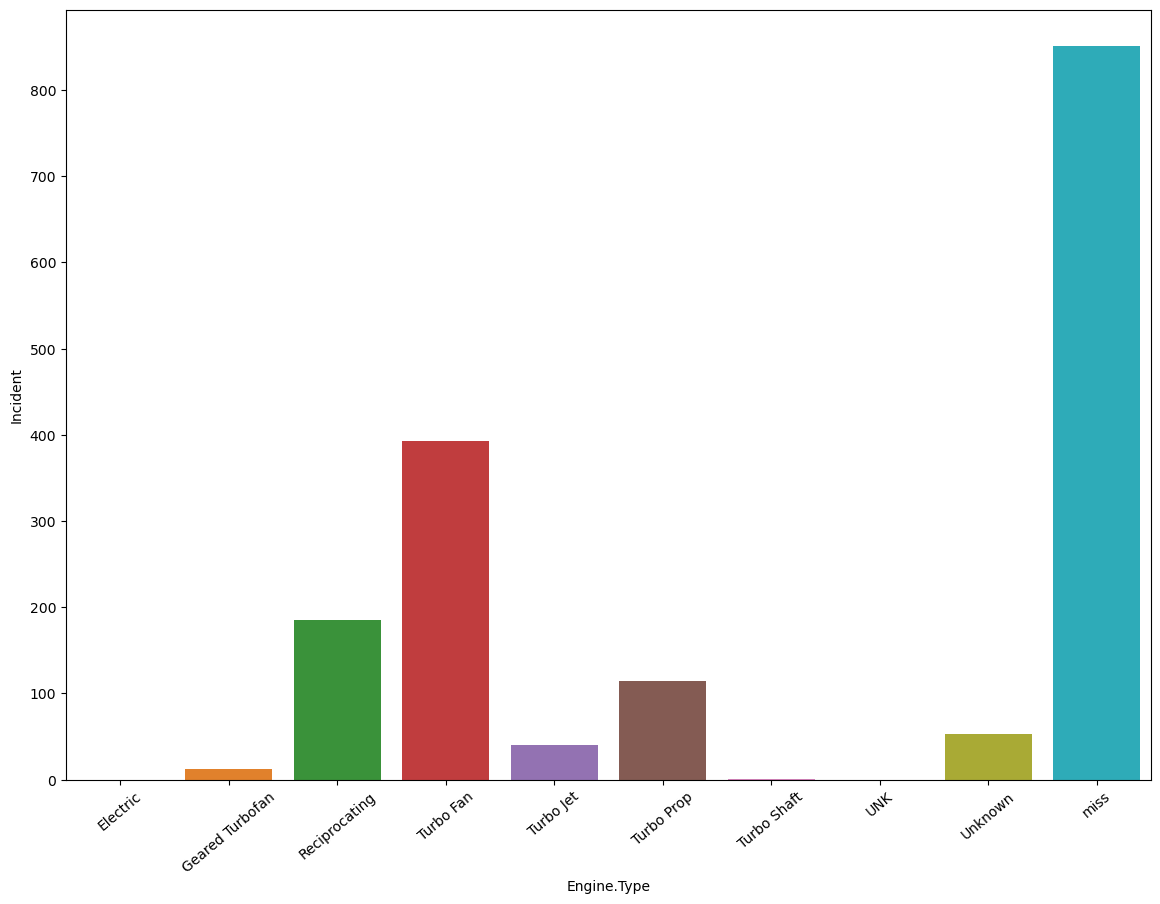

In [347]:
engine_accidents = df.groupby(
    'Engine.Type'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()
engine_fig, ax = plt.subplots(figsize=(14, 10))

my_plot = sns.barplot(data=engine_accidents, x='Engine.Type', y='Incident')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=40);

Checking the available engines in filtered df



In [351]:
available_engines = list(
    fourth_metric_df['Engine.Type'].value_counts().index
)
available_engines.remove('Unknown')
available_engines.remove('miss')


In [352]:
sorted_engine_df = (
    engine_accidents.set_index('Engine.Type').loc[available_engines].sort_values(by='Incident')
)

In [353]:
sorted_engines_names = list(sorted_engine_df.index)

sixth_metric_df = fourth_metric_df[
    fourth_metric_df['Engine.Type'] == sorted_engines_names[0]
]
len(sixth_metric_df)

2

In [354]:
sixth_metric_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
Aircraft.Name,,,,,,,,,,,,,,,,,,,,,
Boeing_b737-2h4,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,miss,miss,ONT,ONTARIO INTERNATIONAL,...,Aircal,0.0,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983,1982
Rockwell_na-265-80,20020917X02153,Incident,FTW82IA146,1982-03-20,"HOUSTON, TX",United States,miss,miss,IAH,HOUSTON INTERCONTINENTAL,...,miss,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,20-03-1983,1982
